In [27]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

print (tf.__version__)

2.2.0


In [28]:
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [29]:
import os

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")


이미지 디렉토리 경로:  /home/ssac9/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [30]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
   
 
print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac9/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [31]:


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  


target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
   
 
print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac9/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


In [34]:
import os
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

y_train = tf.keras.utils.to_categorical(y_train)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=777, stratify=y_train)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3300 입니다.
x_train shape: (2310, 28, 28, 3)
y_train shape: (2310, 3)


라벨:  [0. 0. 1.]


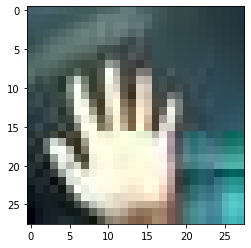

In [35]:
import matplotlib.pyplot as plt
plt.imshow(x_train[180])
print('라벨: ', y_train[0])

In [68]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))

model.add(keras.layers.MaxPool2D(2,2))   
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(18, activation='relu'))
model.add(keras.layers.Dense(9, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [69]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 18)                14418     
_________________________________________________________________
dense_25 (Dense)             (None, 9)               

In [70]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0

print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))
x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)
x_test_reshaped=x_test_norm.reshape(-1, 28, 28, 3)
print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

학습데이터(x_train)의 이미지 개수는 3300 입니다.
Before Reshape - x_train_norm shape: (3300, 28, 28, 3)
Before Reshape - x_test_norm shape: (990, 28, 28, 3)
After Reshape - x_train_reshaped shape: (3300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (990, 28, 28, 3)


In [71]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 6ms/step - loss: 1.1877 - accuracy: 0.3573
Epoch 2/10
104/104 [==============================] - 1s 5ms/step - loss: 1.0550 - accuracy: 0.4503
Epoch 3/10
104/104 [==============================] - 1s 6ms/step - loss: 0.9249 - accuracy: 0.5848
Epoch 4/10
104/104 [==============================] - 1s 6ms/step - loss: 0.7740 - accuracy: 0.6715
Epoch 5/10
104/104 [==============================] - 1s 7ms/step - loss: 0.6325 - accuracy: 0.7533
Epoch 6/10
104/104 [==============================] - 1s 5ms/step - loss: 0.5284 - accuracy: 0.7973
Epoch 7/10
104/104 [==============================] - 1s 6ms/step - loss: 0.4659 - accuracy: 0.8258
Epoch 8/10
104/104 [==============================] - 1s 5ms/step - loss: 0.3807 - accuracy: 0.8721
Epoch 9/10
104/104 [==============================] - 1s 6ms/step - loss: 0.3425 - accuracy: 0.8782
Epoch 10/10
104/104 [==============================] - 1s 7ms/step - loss: 0.2989 - accuracy: 0.8933